In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from decimal import Decimal
import math
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("corrected_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15049 entries, 0 to 15048
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              15049 non-null  object 
 1   voltage_level[V]  15049 non-null  int64  
 2   width[percent]    15049 non-null  int64  
 3   input[V]          15049 non-null  float64
 4   output[V]         15049 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 588.0+ KB


In [3]:
data.tail(89)

,time,voltage_level[V],width[percent],input[V],output[V]
14960,21:21:25,25,70,16.714675,1.635115
14961,21:21:27,25,70,16.728416,1.635087
14962,21:21:29,25,70,16.713248,1.635134
14963,21:21:39,25,80,19.928523,1.948411
14964,21:21:41,25,80,19.929038,1.948384
...,...,...,...,...,...
15044,21:24:21,25,80,19.940912,1.948149
15045,21:24:23,25,80,19.941192,1.948104
15046,21:24:25,25,80,19.941300,1.948086
15047,21:24:27,25,80,19.941059,1.948088


In [4]:
widths = ["20", "30", "40", "50", "60", "70", "80"]
voltages =  [i+1 for i in range(25)]
data["output[V]"] = [i*10 for i in data["output[V]"]]
print(data["output[V]"])

0         0.168269
1         0.168242
2         0.168273
3         0.168255
4         0.168271
           ...    
15044    19.481495
15045    19.481043
15046    19.480860
15047    19.480876
15048    19.480983
Name: output[V], Length: 15049, dtype: float64


In [5]:
data.head()

,time,voltage_level[V],width[percent],input[V],output[V]
0,12:39:41,1,20,0.174552,0.168269
1,12:39:43,1,20,0.174514,0.168242
2,12:39:45,1,20,0.174514,0.168273
3,12:39:47,1,20,0.174536,0.168255
4,12:39:49,1,20,0.174517,0.168271


In [6]:
def std_calc(list_of_voltages):
    sum_square = 0
    summ = 0
    counter = 0
    
    for item in list_of_voltages:
        
        counter += 1
        sum_square += item**2
        summ += item
        
    value = abs(sum_square/counter - (summ/counter)**2)
    
    if value != 0:
        std = np.sqrt(value)
    else:
        std = 0
        
    return std

In [7]:
features = ["voltage_level[V]", "width[percent]", "input[V]", "output[V]"]

In [8]:
mean_dictionary = {"voltage_level[V]":[], "width[percent]":[], "input[V]":[], "output[V]":[]}
std_dictionary = {"std_input[V]":[], "std_output[V]":[]}

In [9]:
for volt in voltages:
    filter1 = data["voltage_level[V]"] == volt
    data1 = data[filter1]
    for width in widths:
        filter2 = data1["width[percent]"] == int(width)
        data2 = data1[filter2]
        for feature in features:
            part = [i for i in data2[feature]]
            mean = np.mean(part)
            mean_dictionary[feature].append(mean)
            if feature == "input[V]":
                std = std_calc(part)
                std_feature = "std_input[V]"
                std_dictionary[std_feature].append(std)
            elif feature == "output[V]":
                std = std_calc(part)
                std_feature = "std_output[V]"
                std_dictionary[std_feature].append(std)

In [10]:
analysis_dict = {"voltage_level[V]":mean_dictionary["voltage_level[V]"], "width[percent]":mean_dictionary["width[percent]"], 
                 "input[V]":mean_dictionary["input[V]"], "output[V]":mean_dictionary["output[V]"], 
                 "std_input[V]":std_dictionary["std_input[V]"], "std_output[V]":std_dictionary["std_output[V]"]}
features1 = ["voltage_level[V]", "width[percent]", "input[V]", "output[V]", "std_input[V]", "std_output[V]"]

In [11]:
dataFrame = pd.DataFrame(analysis_dict, columns = features1)
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   voltage_level[V]  175 non-null    float64
 1   width[percent]    175 non-null    float64
 2   input[V]          175 non-null    float64
 3   output[V]         175 non-null    float64
 4   std_input[V]      175 non-null    float64
 5   std_output[V]     175 non-null    float64
dtypes: float64(6)
memory usage: 8.3 KB


In [12]:
dataFrame.head(10)

,voltage_level[V],width[percent],input[V],output[V],std_input[V],std_output[V]
0,1.0,20.0,0.174508,0.168239,0.000035,0.000035
1,1.0,30.0,0.305311,0.294328,0.000039,0.000037
2,1.0,40.0,0.403873,0.389338,0.000052,0.000051
3,1.0,50.0,0.493314,0.475571,0.000072,0.000062
4,1.0,60.0,0.582657,0.561728,0.000069,0.000065
5,1.0,70.0,0.680745,0.656406,0.000132,0.000113
6,1.0,80.0,0.809965,0.781517,0.000129,0.000093
7,2.0,20.0,0.347398,0.334901,0.000068,0.000066
8,2.0,30.0,0.608937,0.587085,0.000052,0.000044
9,2.0,40.0,0.805344,0.777036,0.000091,0.000055


In [13]:
currents = [i/50 for i in dataFrame["output[V]"]]
std_current = [i/50 for i in dataFrame["std_output[V]"]]

In [14]:
input_volt = dataFrame["input[V]"].values
output_volt = dataFrame["output[V]"].values
std_input =  dataFrame['std_input[V]'].values
std_output = dataFrame["std_output[V]"].values

In [15]:
std_volts = []
for i in range(len(currents)):
    std = math.sqrt((std_input[i])**2 + (std_output[i])**2 )
    std_volts.append(std)

In [16]:
combine_std_percent = []
volt_diff = []
for i in range(len(currents)):
    volt_diff.append(input_volt[i] - output_volt[i])
for i in range(len(currents)):
    voltage = (std_volts[i]/volt_diff[i])**2
    current = (std_current[i]/currents[i])**2
    deltaQ = math.sqrt(voltage + current)
    combine_std_percent.append(deltaQ)

In [17]:
len(combine_std_percent)

175

In [18]:
widths = ["20", "30", "40", "50", "60", "70", "80"]
voltages =  [i+1 for i in range(25)]
x_label = []
i = 0
for volt in voltages:
    for width in widths:
        i += 1
        x_label.append(i)

In [19]:
resistance_values = []
for i in range(len(currents)):
    res = (input_volt[i] - output_volt[i]) / currents[i]
    resistance_values.append(res)
len(resistance_values)

175

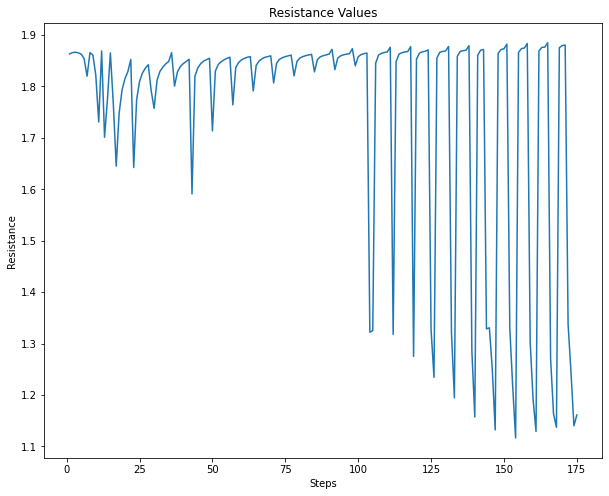

In [20]:
plt.figure(figsize = (10, 8))
plt.plot(x_label, resistance_values)
plt.xlabel("Steps")
plt.ylabel("Resistance")
plt.title("Resistance Values")
plt.savefig("resistance_values.jpeg")

In [21]:
#combine_std_percent = [float(i) for i in combine_std_percent]
resistance_values = [float(i) for i in resistance_values]

In [22]:
combined_std = []
for i in range(len(resistance_values)):
    deltaSTD = resistance_values[i] * combine_std_percent[i]
    combined_std.append(deltaSTD)

In [23]:
linear_reg = LinearRegression()
x = np.array(x_label)
y = np.array(resistance_values)
# fix shapes for regression
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
linear_reg.fit(x, y)
array = np.array(x_label).reshape(-1, 1)
#array.shape
y_head = linear_reg.predict(array)

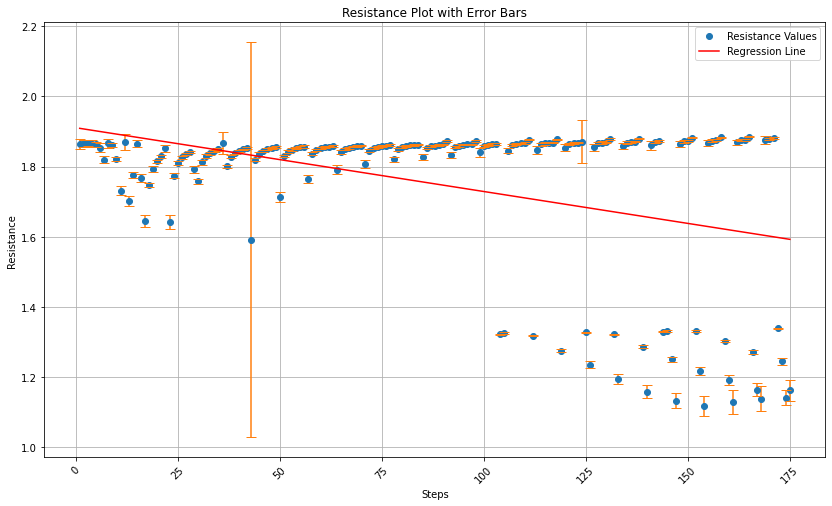

In [24]:
plt.figure(figsize = (14, 8))
plt.plot(x_label, resistance_values, 'o', label = "Resistance Values")
plt.errorbar(x_label, resistance_values, yerr = combined_std, fmt = ' ', capsize = 5)
plt.plot(array, y_head, color = 'red', label = "Regression Line")
plt.xlabel("Steps")
plt.ylabel("Resistance")
plt.legend()
plt.grid("on")
plt.title("Resistance Plot with Error Bars")
plt.xticks(rotation=45)
plt.savefig("res_plot_with_error_bars.jpeg")

In [25]:
dataFrame.to_csv ('C:\\Users\\aunal\\Downloads\\res_calc\\mean_std_values.csv', index = False, header = True)